In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from highlight_text import ax_text, fig_text
from pypalettes import load_cmap
from pyfonts import load_google_font

In [2]:
gdf = gpd.read_file('https://maps.amsterdam.nl/open_geodata/geojson_lnglat.php?KAARTLAAG=BOUWJAAR&THEMA=bouwjaar')

# Creating period of construction categorical labels and adding as a new column to the dataframe
bins = [0, 1859, 1900, 1919, 1939, 1959, 1979, 1999, 2019, float('inf')]
labels = ['Before 1860', '1860-1899', '1900-1919', '1920-1939', 
          '1940-1959', '1960-1979', '1980-1999',
          '2000-2019', '2020-Present']

gdf['period'] = pd.cut(gdf['Bouwjaar'], bins=bins, labels=labels)

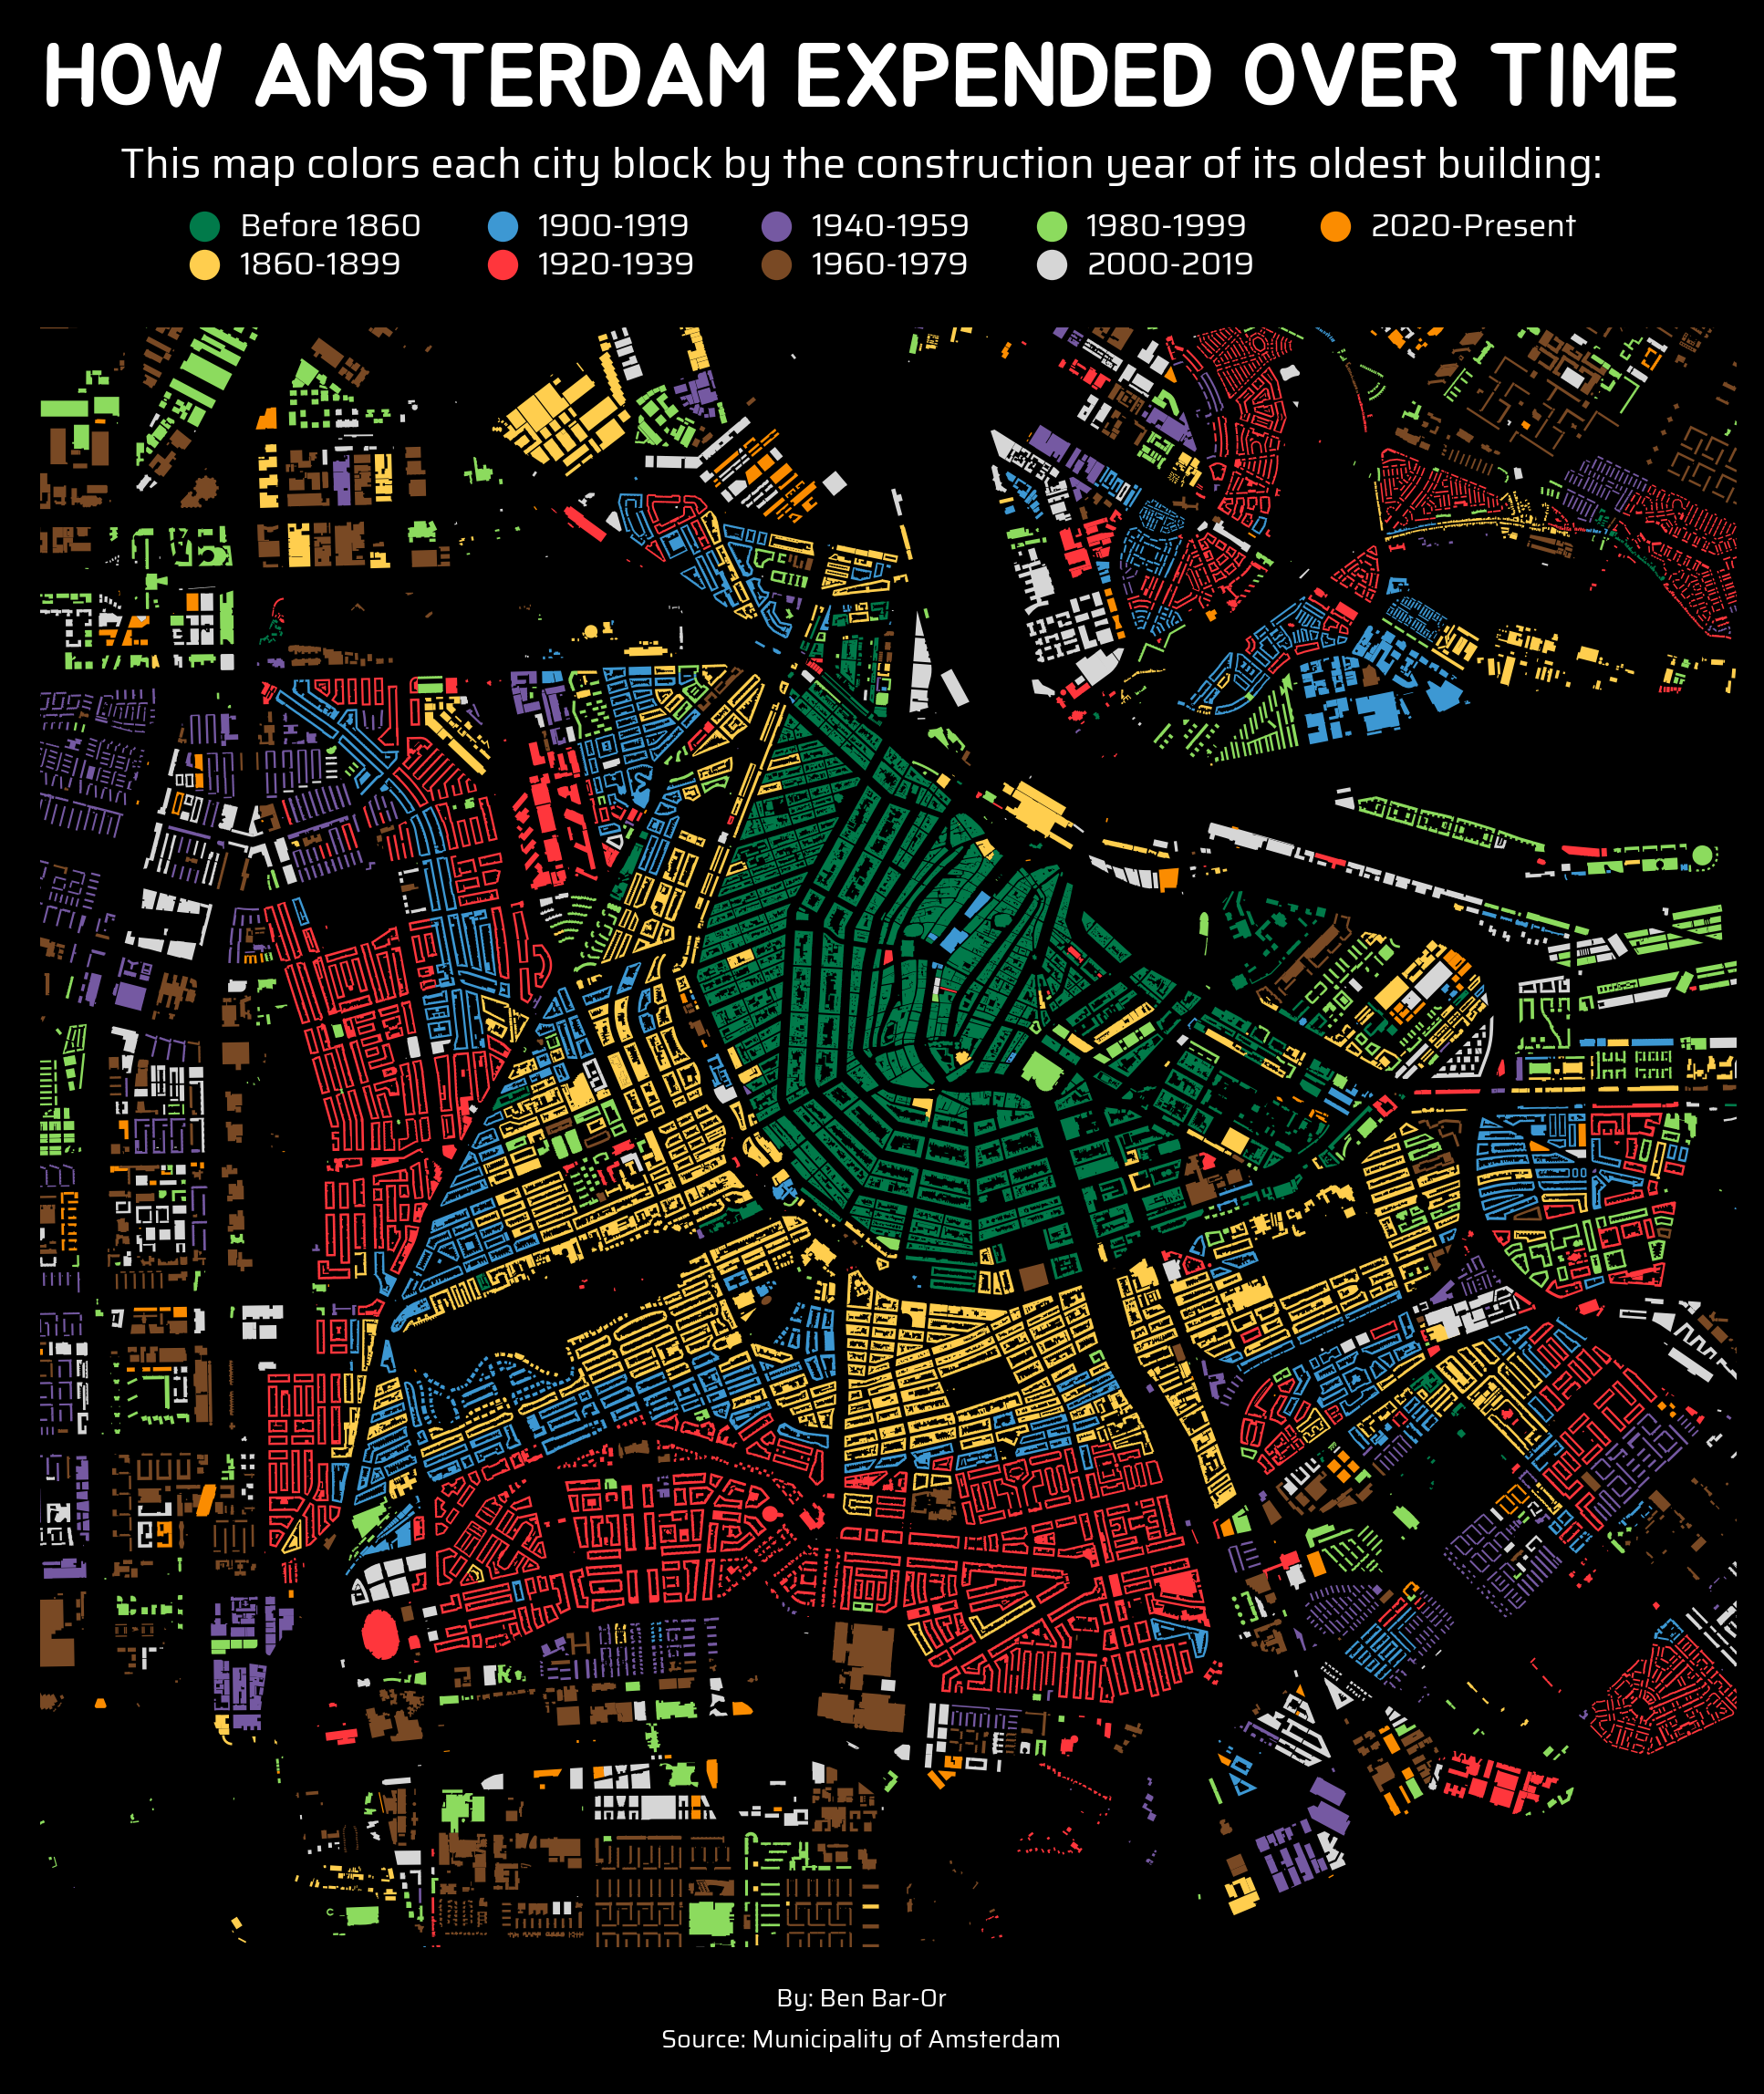

In [37]:
fig, ax = plt.subplots(dpi=300, figsize = (8,10))

cmap = load_cmap("mpalette")
title = load_google_font('Jua')
subtitle = load_google_font('Saira')
# OG font is 'Montserrat'
gdf.plot(column = 'period', linewidth = 0.8, zorder=2, cmap=cmap,
                             legend = True, 
                             legend_kwds={'loc':'center',
                                         'ncols': 5,
                                         'labelcolor':'white',
                                         'frameon': False,
                                         'bbox_to_anchor':(0.5, 1.05), 
                                         'markerscale':0.8, 
                                         'labelspacing':0.2,
                                         'handlelength': 0.25,
                                         'handleheight': 0,
                                         'alignment':'center'}, ax=ax)

# Adjustments to the legend's labels:
for text in ax.get_legend().get_texts():
    text.set_fontproperties(subtitle)
    text.set_fontsize('small')

# Main title:
fig_text(x=0.5,y=0.88,
        s="HOW AMSTERDAM EXPENDED OVER TIME", 
         va='center', ha = 'center',
        font = title,
         weight = 'bold',
        color = 'white',
        fontsize = 23.5)
# Sub-title (also functioning as legend's title):
fig_text(x=0.5,y=0.85,
        s="This map colors each city block by the construction year of its oldest building:", 
         va='center', ha = 'center',
        font = subtitle,
        color = 'white',
        fontsize = 11)

# Footer
fig_text(x= 0.5, y = 0.18,
         s= "By: Ben Bar-Or",
         va='center', ha = 'center',
         font = subtitle,
         color = 'white',
         fontsize = 6.5)

fig_text(x= 0.5, y = 0.165,
         s= "Source: Municipality of Amsterdam",
         va='center', ha = 'center',
         font = subtitle,
         color = 'white',
         fontsize = 6.5)

#Zooming in on the main part of the city:
ax.set_xlim(4.83,4.95)
ax.set_ylim(52.33,52.4)

ax.axis('off')
fig.set_facecolor('black')

# plt.savefig("amsterdam_dev.png", dpi = 300, bbox_inches = 'tight')
plt.show()